# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:black">  Numerical exercises 4</span>

## - <span style="color:blue"> First:</span> the c++ codes are in the folder exercises_04 (remember to read the file READ_ME first)
## - <span style="color:blue"> Second:</span> run the following cells in order to do the data analysis

### Exercise 04.1

The Molecular Dynamics (MD) code starts the simulation run from a provided spatial configuration of the $N$ particles (file: <font face="Courier">config.0</font>) and, once the simulation is finished, it writes out the final configuration (file: <font face="Courier">config.final</font>). 
1. <span style="color:red">Improve the MD code by enabling (you should insert this option via a boolean-like variable in the input file) the **possibility** to **(re)start** reading not only a **actual** spatial configuration [$\vec{r}(t)$] file but also an **old** spatial configuration [$\vec{r}(t-dt)$] file</span> (files: <font face="Courier">old.0</font> and <font face="Courier">old.final</font>).
2. Moreover, <span style="color:red">add the possibility to rescale the velocities [i.e. to correct $\vec{r}(t-dt)$] in order to match a desired temperature</span>.
3. In your report, put some pictures which show that you have been able to equilibrate the thermodynamic phases at the beginning of your simulations.

The typical required operations when the re-start option will be enabled are:
1. read $\vec{r}(t)$ and $\vec{r}(t-dt)$ from the corresponding input files
2. compute $\vec{r}(t+dt)$ with one step of the Verlet algorithm; with $\vec{r}(t+dt)$ and $\vec{r}(t)$ compute $\vec{v}(t+dt/2)$; finally obtain the actual temperature $T(t+dt/2)$
3. by comparing $T(t+dt/2)$ with the desired/target temperature  $T^\star$ extract a scaling factor for the velocities and rescale them: $\vec{v}(t) \to \vec{v}_s(t)$
4. use $\vec{v}_s(t)$ to estimate a novel **old** spatial configuration: $\vec{r}_{new}(t) = \vec{r}(t+dt) - dt \vec{v}_s$
5. use $\vec{r}_{new}(t)$ and $\vec{r}(t+dt)$ to start the simulation
6. Do not forget to use **periodic boundary contitions** every time it is appropriate!

This will help you, especially in the equilibration phases of your simulations.

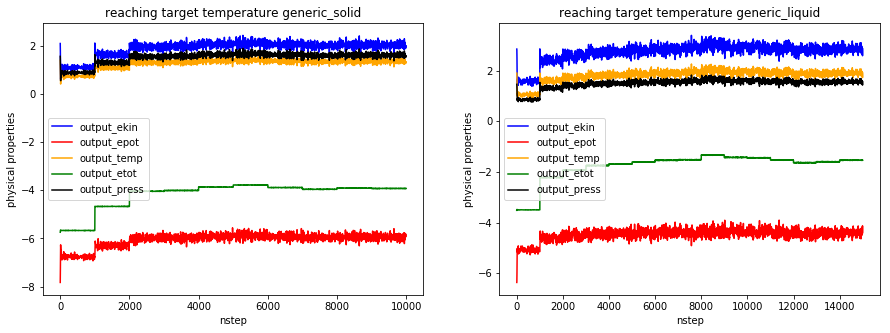

In [6]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

nstep1=10000 
fig,axs = plt.subplots(nrows=1,ncols=2,figsize=(15, 5))
folder = "generic_solid","generic_liquid"
name = "output_ekin","output_epot","output_temp","output_etot","output_press"
color = "blue","red","orange","green","black"

for j in range(2):
    for i in range(5):
        x = np.loadtxt("raggiungimento_eq/"+folder[j]+"/"+name[i]+str(nstep1)+".dat",usecols=(0),delimiter=' ',unpack='true')
        axs[j].plot(x,color=color[i])
        axs[j].set_ylabel("physical properties")
        axs[j].set_xlabel("nstep")
    axs[j].set_title("reaching target temperature "+folder[j])
    axs[j].legend(name)
   
plt.show()

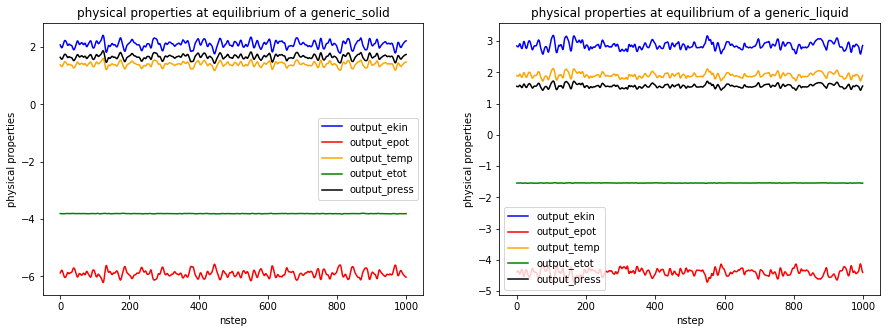

In [2]:
fig,axs = plt.subplots(nrows=1,ncols=2,figsize=(15, 5))
for j in range(2):
    for i in range(5):
        x = np.loadtxt(folder[j]+"_"+str(nstep1)+"/"+name[i]+str(nstep1)+".dat",usecols=(0),delimiter=' ',unpack='true')
        axs[j].plot(x,color=color[i])
        axs[j].set_ylabel("physical properties")
        axs[j].set_xlabel("nstep")
    axs[j].set_title("physical properties at equilibrium of a "+folder[j])
    axs[j].legend(name)
   
plt.show()

### Exercise 04.2

The Molecular Dynamics code we have provided prints out only instantaneous values for the total (internal) energy per particle, $E/N$, potential energy per particle, $U/N$, kinetic energy per particle, $K/N$, and temperature, $T$.
Take the MD code and include block averaging: 

Divide the <span style="color:blue"><font face="Courier">nstep</font></span> of the simulation into <span style="color:blue"><font face="Courier">nblocks</font></span>. By exploiting these blocks, <span style="color:red">code the calculation of the average values and the uncertainties for $E/N$, $U/N$, $K/N$ and $T$</span>, that will be written in new specific output files, for example: <font face="Courier">ave_epot.out, ave_ekin.out, ave_etot.out, ave_temp.out</font></span>

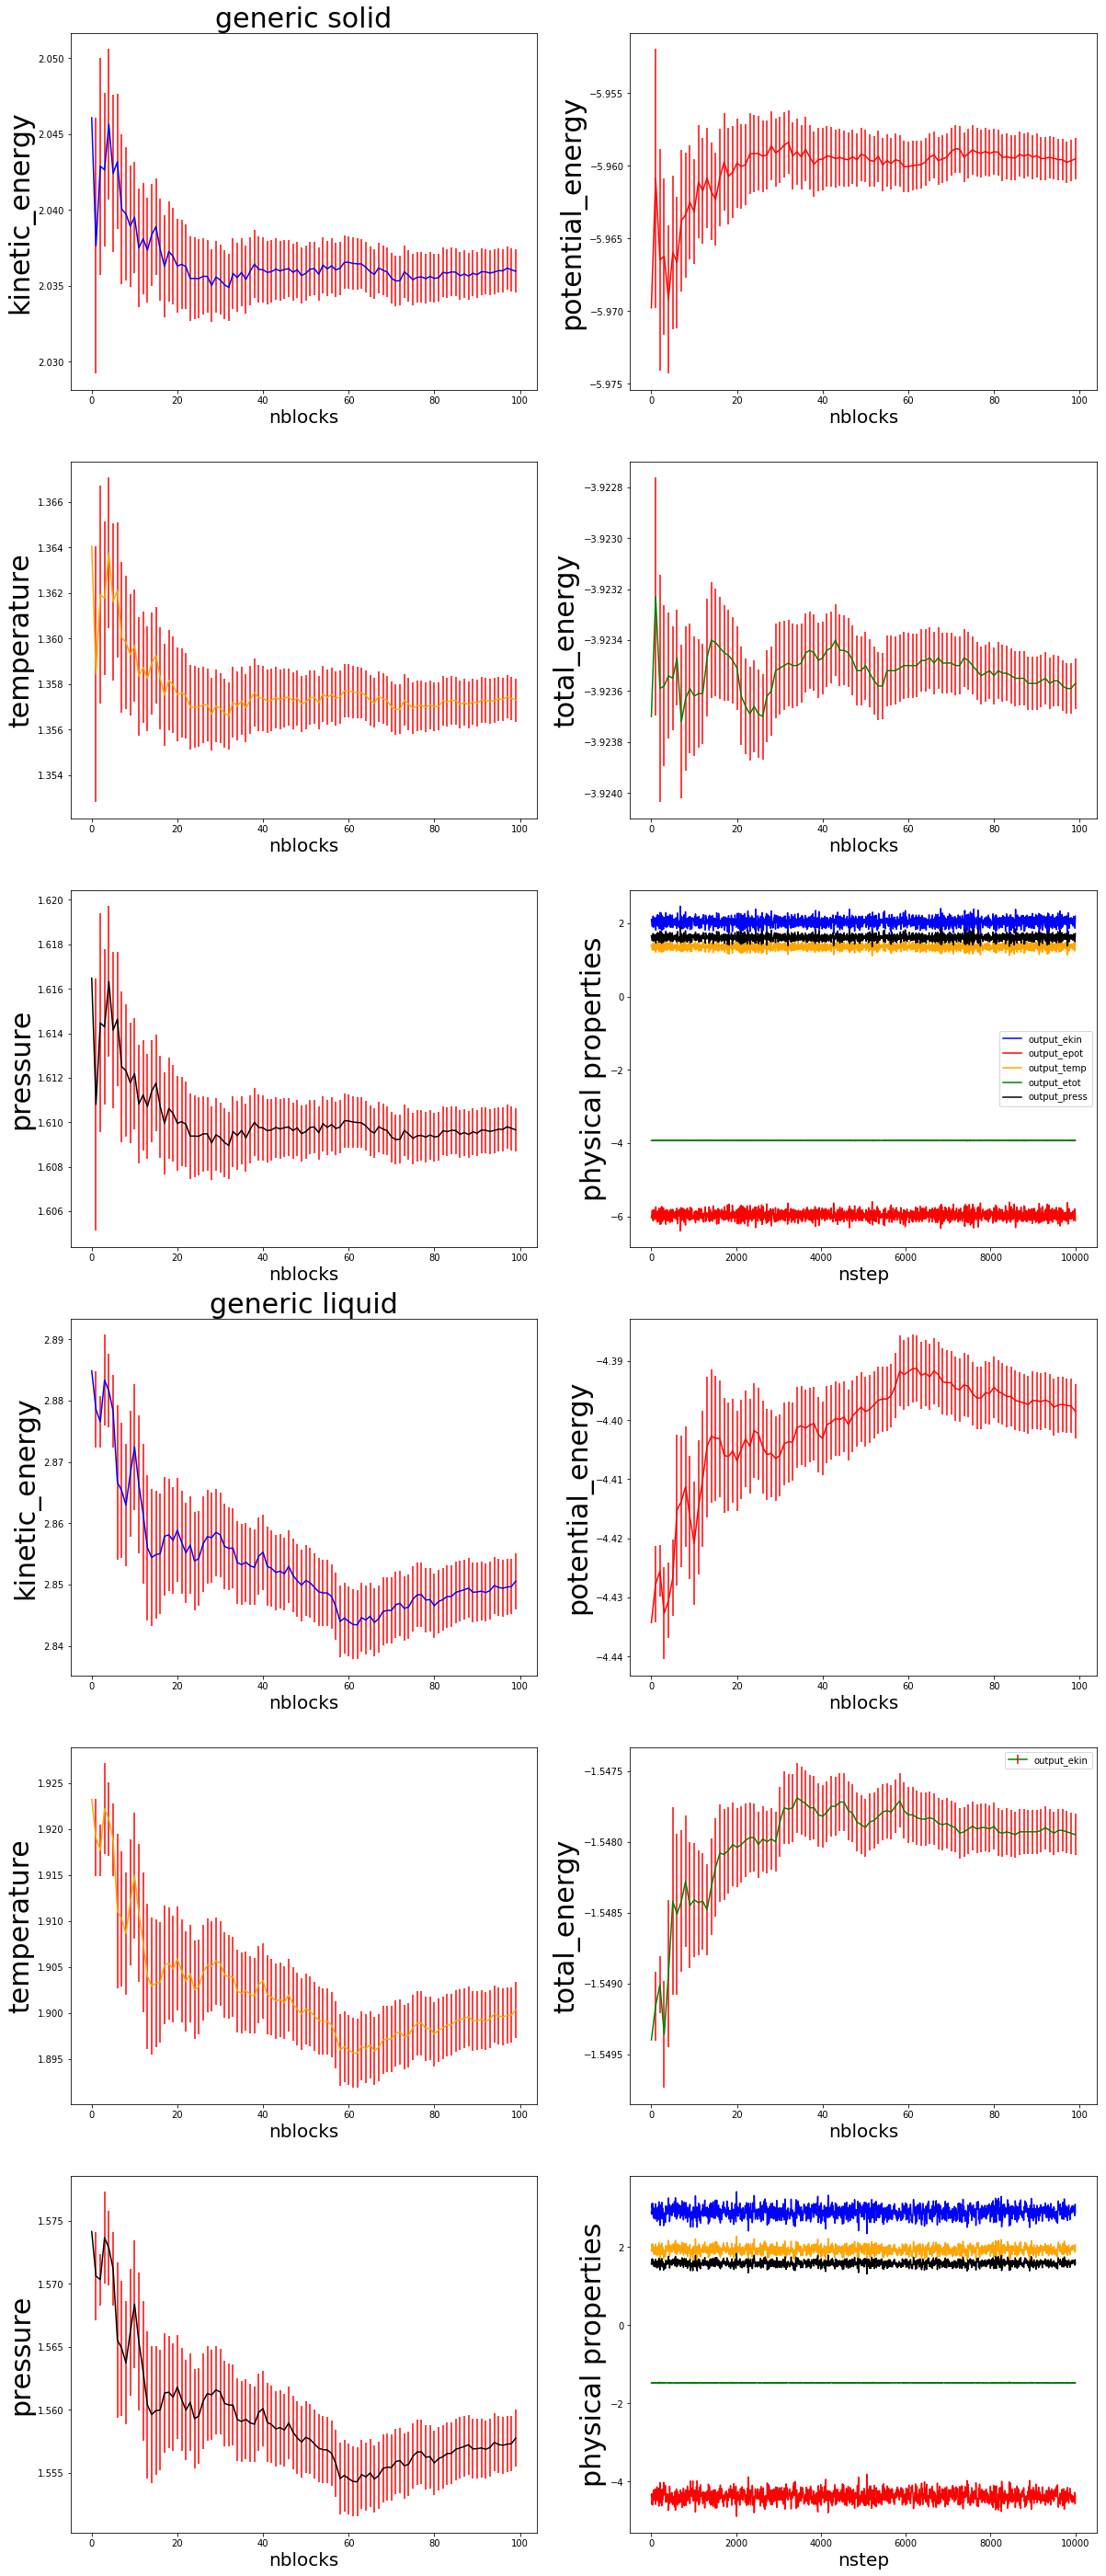

In [3]:
name = "ave_ekin","ave_epot","ave_temp","ave_etot","ave_press"
title = "kinetic_energy","potential_energy","temperature","total_energy","pressure","physical properties"
e_col = "red","blue","green","silver","cyan","ivory","orchid"
name_properties = "output_ekin","output_epot","output_temp","output_etot","output_press"

nstep=100000
N=100
x = np.arange(N)
k=0

fig,axs = plt.subplots(nrows=3*2,ncols=2,figsize=(20, 50))
for p in range(2):
    k=0
    x = np.arange(N)
    for j in range(3):
            for i in range(2):
                if (j==2 and i==1):
                    for l in range(5):
                        x = np.loadtxt(folder[p]+"_"+str(nstep)+"/"+name_properties[l]+str(nstep)+".dat",usecols=(0),delimiter=' ',unpack='true')
                        axs[j+3*p][i].plot(x,color=color[l])
                        axs[j+3*p][i].set_ylabel("physical properties",fontsize=30)
                        axs[j+3*p][i].set_xlabel("nstep",fontsize=20)
                    axs[j+2*p][i].legend(name_properties)
                else:
                    sum_prog,err_prog = np.loadtxt(folder[p]+"_"+str(nstep)+"/"+name[k]+str(nstep)+".out",usecols=(0,1),delimiter=' ',unpack='true')
                    axs[j+3*p][i].errorbar(x,sum_prog,yerr=err_prog,color=color[k],ecolor=e_col[0])
                    axs[j+3*p][i].set_xlabel("nblocks",fontsize=20)
                    axs[j+3*p][i].set_ylabel(title[k],fontsize=30)
                if(p==0 and j==0 and i==0):
                    axs[j+3*p][i].set_title("generic solid",fontsize=30)
                if(p==1 and j==0 and i==0):
                    axs[j+3*p][i].set_title("generic liquid",fontsize=30)
                k+=1

plt.show()

### Exercise 04.3

By means of your upgraded MD code, equilibrate and <span style="color:red">perform MD simulations via a Lennard-Jones model</span> of Argon ($\sigma = 0.34$ nm, $\epsilon/k_B = 120$ K, $m=39.948$ amu) in the following conditions:
1. solid phase: $\rho^\star = 1.1$, $T^\star = 0.8$ (cut-off radius: $r_c = 2.2$)
2. liquid phase: $\rho^\star = 0.8$, $T^\star = 1.1$ (cut-off radius: $r_c = 2.5$)
3. gas phase: $\rho^\star = 0.05$, $T^\star = 1.2$ (cut-off radius: $r_c = 5.0$)

and show in pictures the obtained average values and uncertainties for the total (internal) energy per particle, $E/N$, the potential energy per particle, $U/N$, the kinetic energy per particle, $K/N$ and the temperature, $T$ ... in SI units!

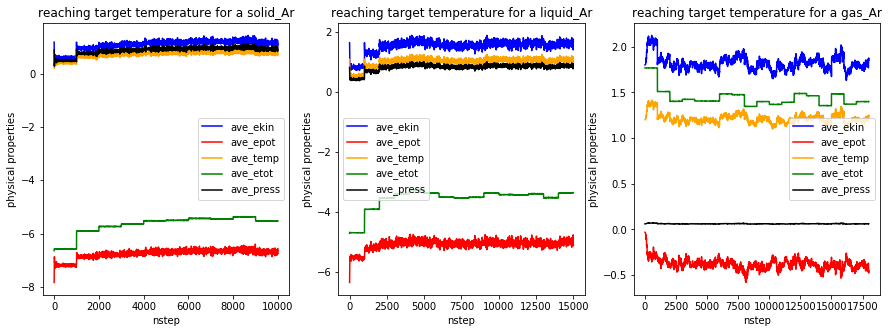

In [4]:
folder1 ="solid_Ar","liquid_Ar","gas_Ar"

fig,axs = plt.subplots(nrows=1,ncols=3,figsize=(15, 5))
for j in range(3):
    for i in range(5):
        x = np.loadtxt("raggiungimento_eq/"+folder1[j]+"/"+name_properties[i]+str(nstep1)+".dat",usecols=(0),delimiter=' ',unpack='true')
        axs[j].plot(x,color=color[i])
        axs[j].set_ylabel("physical properties")
        axs[j].set_xlabel("nstep")
    axs[j].set_title("reaching target temperature for a "+folder1[j])
    axs[j].legend(name)

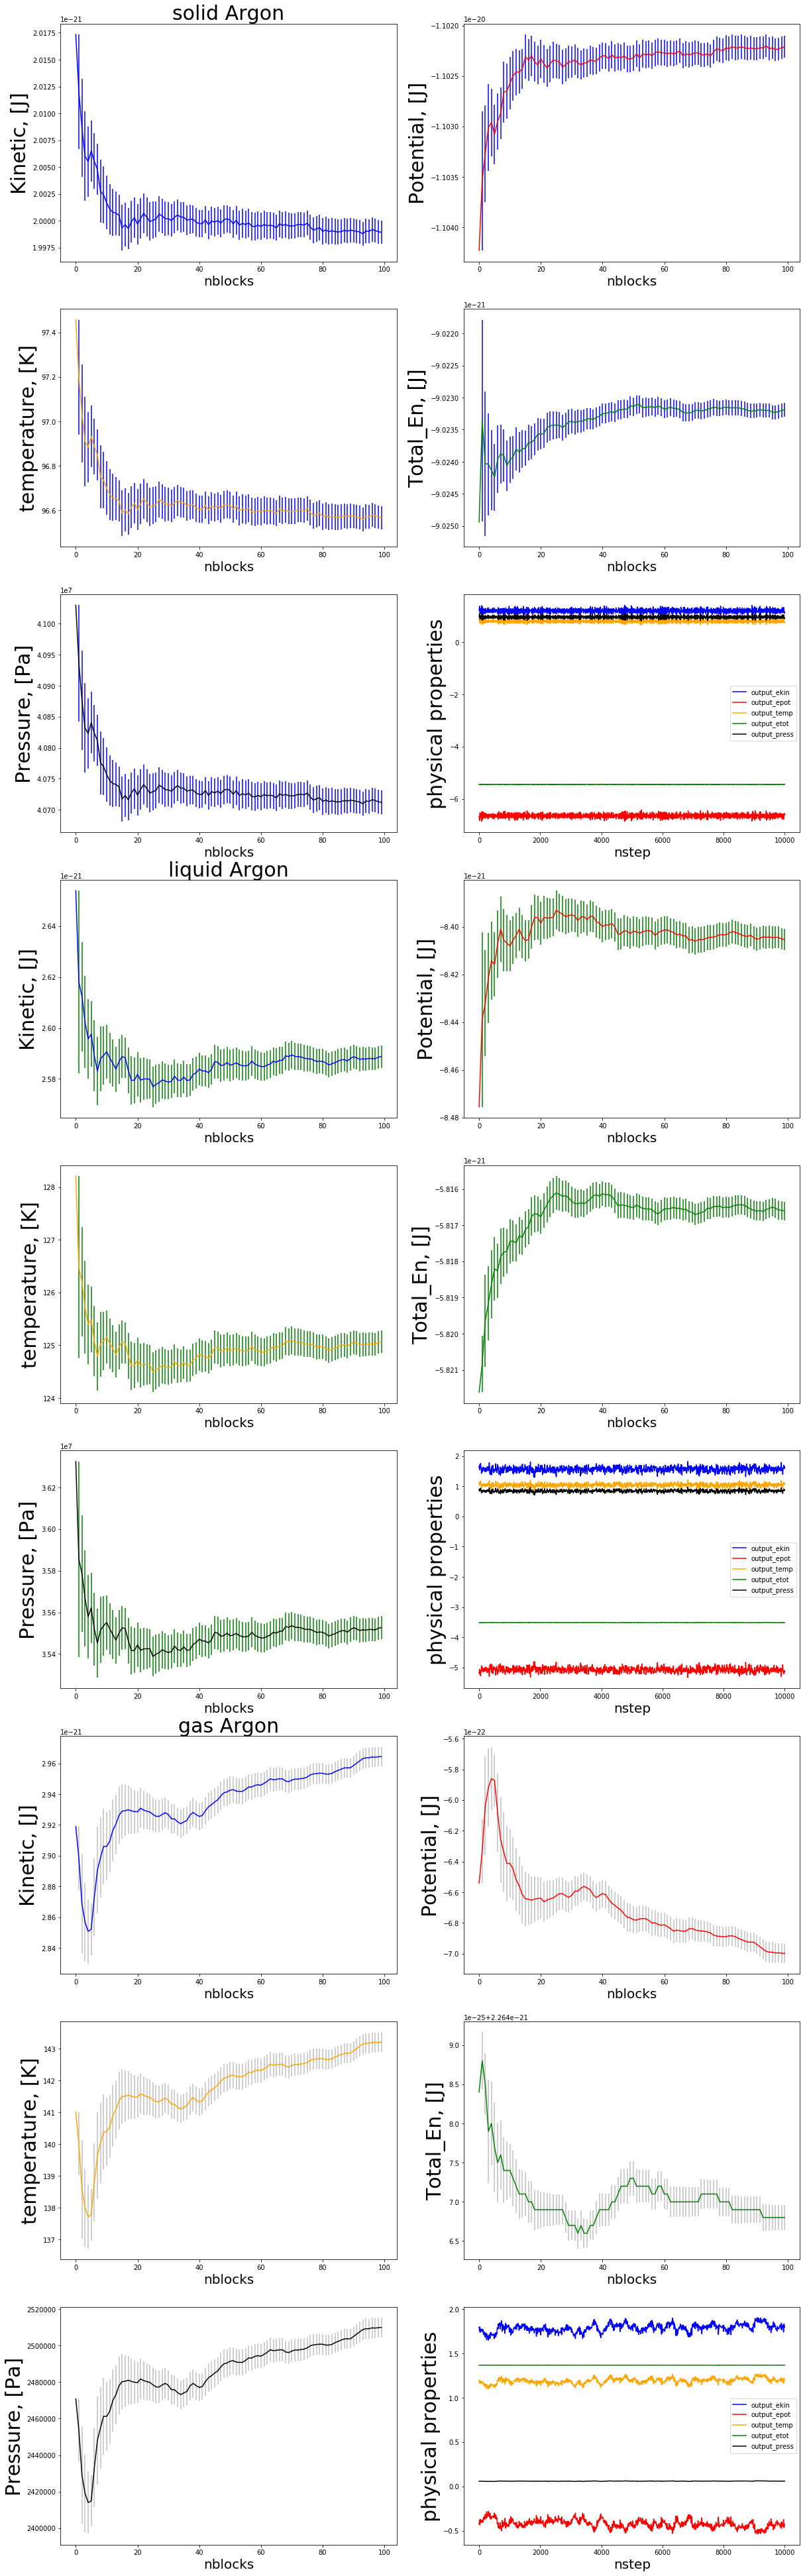

In [5]:
y_lab = "Kinetic, [J]","Potential, [J]","temperature, [K]","Total_En, [J]","Pressure, [Pa]"

k=0
fig,axs = plt.subplots(nrows=3*3,ncols=2,figsize=(20, 70))
for p in range(3):
    k=0
    x = np.arange(N)
    for j in range(3):
            for i in range(2):
                if (j==2 and i==1):
                    for l in range(5):
                        x = np.loadtxt(folder1[p]+"/"+name_properties[l]+str(nstep)+".dat",usecols=(0),delimiter=' ',unpack='true')
                        axs[j+3*p][i].plot(x,color=color[l])
                        axs[j+3*p][i].set_ylabel("physical properties",fontsize=30)
                        axs[j+3*p][i].set_xlabel("nstep",fontsize=20)
                    axs[j+3*p][i].legend(name_properties)
                else:
                    sum_prog,err_prog = np.loadtxt(folder1[p]+"/"+name[k]+str(nstep)+"SI.out",usecols=(0,1),delimiter=' ',unpack='true')
                    axs[j+3*p][i].errorbar(x,sum_prog,yerr=err_prog,color=color[k],ecolor=e_col[1+p])
                    axs[j+3*p][i].set_xlabel("nblocks",fontsize=20)
                    axs[j+3*p][i].set_ylabel(y_lab[k],fontsize=30)
                if(p==0 and j==0 and i==0):
                    axs[j+3*p][i].set_title("solid Argon",fontsize=30)
                if(p==1 and j==0 and i==0):
                    axs[j+3*p][i].set_title("liquid Argon",fontsize=30)
                if(p==2 and j==0 and i==0):
                    axs[j+3*p][i].set_title("gas Argon",fontsize=30)
                k+=1

plt.show()

### <span style="color:green"> Optional exercise</span>

Include the calculation of the pressure, $P$, inside your Molecular Dynamics code: istantaneous values, average values and uncertainties.

Remember that, via the **virial theorem**, the pressure in a Lennard-Jones system can be estimated by means of:

$$ P = \rho k_B T + \frac{1}{3V} \left\langle \sum_{i=1}^{N-1} \sum_{j\,(>i)}^N 48\epsilon \left[ \left(\frac{\sigma}{|\vec{r}_i -\vec{r}_j|}\right)^{12} - 
\frac{1}{2} \left(\frac{\sigma}{|\vec{r}_i -\vec{r}_j|}\right)^6 \right] \right\rangle $$